# Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy import ndimage
from scipy.io import loadmat
import pandas as pd
import os
%matplotlib inline

plt.rcParams['figure.facecolor'] = 'white'
# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams["font.size"] = 16
plt.rcParams["mathtext.fontset"] = "cm"

In [2]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('C:\\Users\\llinc\\GitHub\\python-code\\Modules')
from time_shifted_PID import Histo3D2Dict
from time_shifted_PID import PIfunc
from time_shifted_PID import EqualState
from Spike_Generation import Spike_Time_Generater
from Spike_Generation import NL
from StimulusnResponse import expSnR
from SpatialTemporal_Correlation_and_Convolution import ST_STA
from NGD_TK_AS import NGD2L_TK_AS
from NGD_TK_AS import ParaTrans

importing Jupyter notebook from time_shifted_PID.ipynb
importing Jupyter notebook from J_broja_PID.ipynb
importing Jupyter notebook from Spike_Generation.ipynb
importing Jupyter notebook from StimulusnResponse.ipynb
importing Jupyter notebook from SpatialTemporal_Correlation_and_Convolution.ipynb
importing Jupyter notebook from NGD_TK_AS.ipynb


In [3]:
def angular_gradient(x):
    diffx= np.gradient(x)
    diffx[np.abs(diffx)>0.6*np.pi] -= np.pi*diffx[np.abs(diffx)>0.6*np.pi]/abs(diffx[np.abs(diffx)>0.6*np.pi])
    return diffx

In [4]:
def cm2inch(value):
    return value/2.54

# Figsetup
Using 20200408 Chou's data, unit2, ch53.<br>
shortcaption: Temporal kernel of the LC model and NGD1d model<br>
label: TK_LC_NGD1d

In [5]:
filename = 'TK_LC_NGD1d'

# Load Experimental data

## select files and channels

In [6]:
cn = 53

NGD2L1DASpara = np.load('D:\\GoogleDrive\\retina\\Chou\'s data\\20200408\\TKfit\\unit2_fitNGD2LASpara.npz', allow_pickle=True)
for k in NGD2L1DASpara.files:
    vars()[k] = NGD2L1DASpara[k][()]

pd.DataFrame(para_dict).loc[cn-1]

epsilon         14.217523
gamma        73996.448279
omegastar       44.711774
deltastar        0.285205
tau_y            0.071035
Dmp             17.541824
error            0.093686
Name: 52, dtype: float64

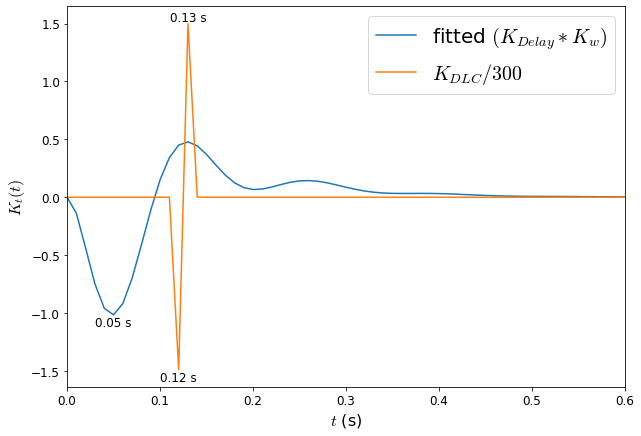

In [7]:
plt.rcParams["font.size"] = 12
dt = 0.01
T = np.arange(0, 1., dt)
Kt = NGD2L_TK_AS(T, *pd.DataFrame(para_dict).loc[cn-1][:-1])
plt.plot(T, Kt)

Lambda = 4.5
TKLC = np.zeros_like(T)
TKLC[12] = 1-Lambda+(Lambda/dt)
TKLC[13] = -(Lambda/dt)

plt.plot(T, -TKLC/300)
plt.xlim([0,0.6])

plt.ylabel(r'$K_t(t)$', fontsize = 16)
plt.xlabel(r'$t$ (s)', fontsize = 16)
plt.legend( (r'fitted $(K_{Delay}*K_w)$', r'$K_{DLC}/300$'), fontsize = 20 )
plt.text( 0.05, np.min(Kt)-0.1, '0.05 s', ha='center')
plt.text( 0.13, -np.min(TKLC/300)+0.02, '0.13 s', ha='center')
plt.text( 0.12, -np.max(TKLC/300)-0.1, '0.12 s', ha='center')

fig=plt.gcf()
fig.set_size_inches(10, 7)

In [8]:
# fig = plt.gcf()
fig.savefig('D:\\GoogleDrive\\retina\\thesis\\fig\\D\\'+filename+'.png',  bbox_inches='tight', pad_inches=0.1, dpi=300)

In [9]:
# plt.plot(timeshift-0.2,Information_list[i][('Beer','UIx')]+Information_list[i][('Beer','Red')], 'r-')
# plt.xlabel(r'$\delta t$ (s)', fontsize = 16)
# plt.ylabel(r'$I(\gamma,\xi; \delta t)$ (bit/s)', fontsize = 16)
# plt.axvline(0, c = 'gray')
# plt.xlim([-0.8, 0.8])

# plt.gcf().savefig('D:\\GoogleDrive\\retina\\thesis\\fig\\M\\TLMIintro_base.png',  bbox_inches='tight', pad_inches=0.1, dpi=300)